## Εργασία Αναλυτικής Δεδομένων 2024

### Προεπεξεργασία Δεδομένων

In [137]:
import numpy as np
import pandas as pd

import sklearn

import seaborn as sns
from matplotlib import pyplot as plt

#### Ανάγνωση Βάσης Δεδομένων
##### Όνομα: Bank Marketing Data Set (https://archive.ics.uci.edu/dataset/222/bank+marketing)

In [138]:
data = pd.read_csv('bank-full.csv', sep=';')

##### Πρώτη γνωριμία με τα Δεδομένα

In [139]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


##### Μέγεθος και Δομή Δεδομένων

In [140]:
data.shape

(45211, 17)

In [141]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [142]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [143]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


##### Διαχωρισμός Αριθμητικών και Κατηγορικών Χαρακτηριστικών

In [144]:
categorical_columns = data[['job', 'education', 'contact', 'poutcome']]
categorical_columns.head()

,job,education,contact,poutcome
0,management,tertiary,unknown,unknown
1,technician,secondary,unknown,unknown
2,entrepreneur,secondary,unknown,unknown
3,blue-collar,unknown,unknown,unknown
4,unknown,unknown,unknown,unknown


In [145]:
boolean_columns = data[['default', 'housing', 'loan', 'y']]
boolean_columns.head()

,default,housing,loan,y
0,no,yes,no,no
1,no,yes,no,no
2,no,yes,yes,no
3,no,yes,no,no
4,no,no,no,no


Τα χαρακτηριστικά boolean δεν είναι ακόμα τύπου boolean, οπότε ποιο κάτω θα μετασχηματιστούν.

In [146]:
boolean_columns = boolean_columns.map(lambda x: True if x == 'yes' else False if x == 'no' else x)
boolean_columns.head()

,default,housing,loan,y
0,False,True,False,False
1,False,True,False,False
2,False,True,True,False
3,False,True,False,False
4,False,False,False,False


In [147]:
numeric_columns = data.select_dtypes(include=['number'])
numeric_columns.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


##### Βασικά Στατιστικά Στοιχεία

In [148]:
numeric_columns.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [149]:
categorical_columns.describe()

,job,education,contact,poutcome
count,45211,45211,45211,45211
unique,12,4,3,4
top,blue-collar,secondary,cellular,unknown
freq,9732,23202,29285,36959


---
##### Εύρεση και Αντιμετώπιση Ακραίων τιμών
Η αναζήτηση ακραίων τιμών έχει νόημα μόνο στα αριθμητικά χαρακτηριστικά ('age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous').
Χρησιμοποιείται η μέθοδος IQR.

In [150]:
clean_numeric_columns = numeric_columns.copy()
for column in numeric_columns.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = numeric_columns[column].quantile(0.25)
        Q3 = numeric_columns[column].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows where outliers exist for the current column
        clean_numeric_columns = numeric_columns[(numeric_columns[column] >= lower_bound) & (numeric_columns[column] <= upper_bound)]


Text(0, 0.5, 'Balance ($)')

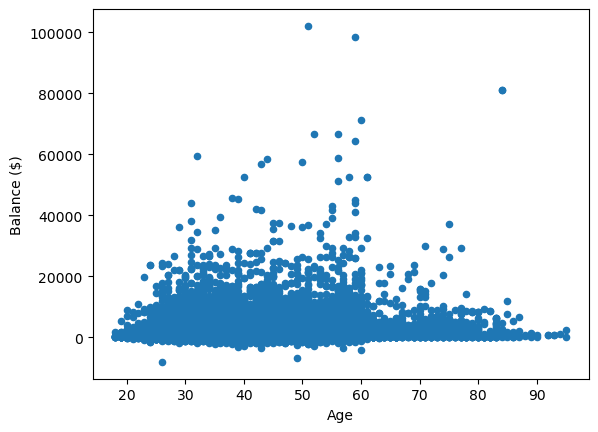

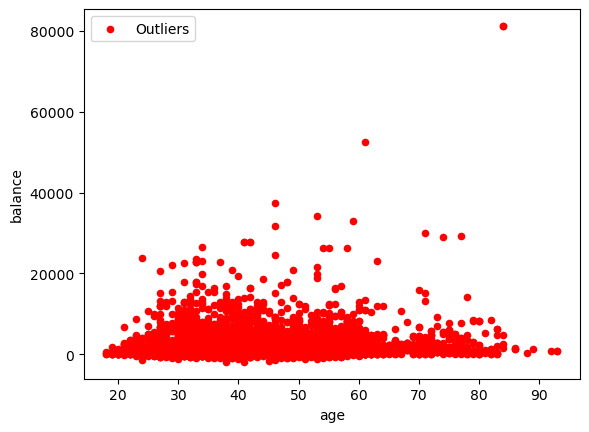

In [163]:
outliers = numeric_columns[~numeric_columns.index.isin(clean_numeric_columns.index)]
#outliers = clean_numeric_columns

fig, ax = plt.subplots(1,1)

numeric_columns.plot.scatter(x='age',y='balance',ax=ax)
# Overlay outliers as red dots on the x-axis
# plt.scatter(outliers['balance'], np.zeros_like(outliers['balance']), color='red', marker='o', label='Outliers', zorder=5)
outliers.plot.scatter(x='age', y='balance',color='red', marker='o', label='Outliers', zorder=5)

ax.set_xlabel('Age')
ax.set_ylabel('Balance ($)')

In [165]:
clean_numeric_columns.describe()

,age,balance,day,duration,campaign,pdays,previous
count,36954.000000,36954.000000,36954.000000,36954.000000,36954.000000,36954.0,36954.0
mean,40.932430,1318.788846,16.145424,257.726119,2.921957,-1.0,0.0
std,10.430218,3039.557077,8.372554,262.256406,3.325791,0.0,0.0
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.0,0.0
25%,33.000000,55.000000,9.000000,101.000000,1.000000,-1.0,0.0
50%,39.000000,414.000000,17.000000,177.000000,2.000000,-1.0,0.0
75%,49.000000,1358.000000,22.000000,318.000000,3.000000,-1.0,0.0
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,-1.0,0.0


Γιατί δεν βγάζει ακραίες τιμές??

--- 

>Βάση των πληροφοριών που παρέχονται από την πηγή τα δεδομένα δεν περιέχουν τιμές NaN (null). Ωστόσο υπάρχουν τιμές σε κατηγορικά 
>χαρακτηριστικά ('unknown' ή 'other') που δηλώνουν την έλλειψη πληροφορίας. Ποιο κάτω θα υπολογιστεί το πλήθος των τιμών αυτών για κάθε
>κατηγορικό χαρακτηριστικό και θα γίνει μία γραφική απεικόνιση ,ώστε να προσδιοριστεί η κατάλληλη προσέγγιση στην συμπλήρωση τους

##### Αριθμός τιμών "unknown"

In [153]:
categorical_columns[(categorical_columns=='unknown')].count()

job            288
education     1857
contact      13020
poutcome     36959
dtype: int64

##### Γραφική Αναπαράσταση Ελλιπών τιμών ανά Χαρακτηριστικό

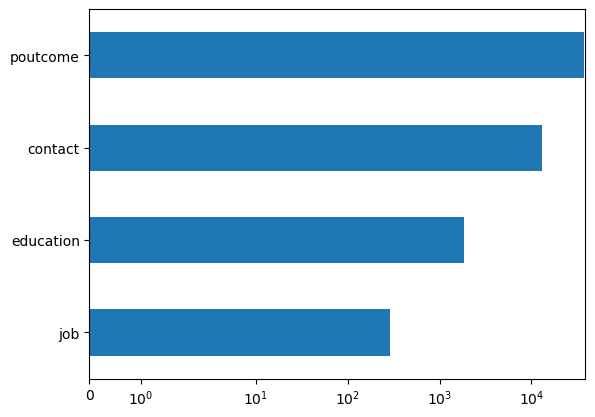

In [154]:
fig, ax = plt.subplots(1,1)
categorical_columns[(categorical_columns=='unknown')].count().plot.barh(ax=ax)

ax.set_xscale('symlog')

##### Ποσοστό εμφάνισης τιμών "unknown" για κάθε κατηγορικό χαρακτηριστικό

In [155]:
categorical_columns[(categorical_columns=='unknown')].count()*100/len(data)

job           0.637013
education     4.107407
contact      28.798301
poutcome     81.747805
dtype: float64

##### Συμπλήρωση ελλιπών τιμών
Στα χαρακτηριστικά **'job'** και **'education'** επειδή το ποσοστό των ελλιπών τιμών είναι μικρό (0.63% και 4.1% αντίστοιχα) και άρα δεν θα είχε ισχυρή επιρροή στη μέση τιμή οι ελλιπείς τιμές θα συμπληρωθούν με την μέση τιμή (most frequent value) του αντίστοιχου χαρακτηριστικού.

In [156]:
# Calculate the mode of the 'job' column
job_mode = categorical_columns['job'].mode()[0]

# Replace 'unknown' values in the 'job' column with the mode
filled_categorical_columns = categorical_columns.copy()
filled_categorical_columns['job']=categorical_columns['job'].replace('unknown',job_mode)

# Check
filled_categorical_columns[filled_categorical_columns['job']=='unknown']['job'].count()

0

In [157]:
# Calculate the mod of the 'education' column
education_mode = categorical_columns['education'].mode()[0]

# Replace 'unknown' values in the 'education' column with the mode
filled_categorical_columns['education']=categorical_columns['education'].replace('unknown',education_mode)

# Check
filled_categorical_columns[filled_categorical_columns['education']=='unknown']['education'].count()

0

Το χαρακτηριστικό **'contact'** έχει ένα σημαντικό ποσοστό (28.79%) ελλιπών τιμών τα οποία αν συμπληρωθούν με την ποιο συχνή τιμή μπορεί τελικά το χαρακτηριστικό να μην αντιπροσωπεύει την πραγματικότητα. Για αυτό το λόγο θα χρησιμοποιηθούν οι πληροφορίες που παρέχουν τα υπόλοιπα χαρακτηριστικά μέσω ενός Bayesian Ταξινομητή ,που θα εκπαιδευτεί στις πλήρεις γραμμές της βάσης δεδομένων για να συμπληρώσει αυτές με τις ελλειπείς τιμές.

In [158]:
filled_categorical_columns.contact.value_counts(sort=False)

contact
unknown      13020
cellular     29285
telephone     2906
Name: count, dtype: int64

Ποσοστό επιτυχίας σε αυτή τη Μαρκετινγκ Καμπάνια 

In [159]:
boolean_columns[['y']].sum()*100/len(data)

y    11.69848
dtype: float64

##### Correlation heatmap

<Axes: >

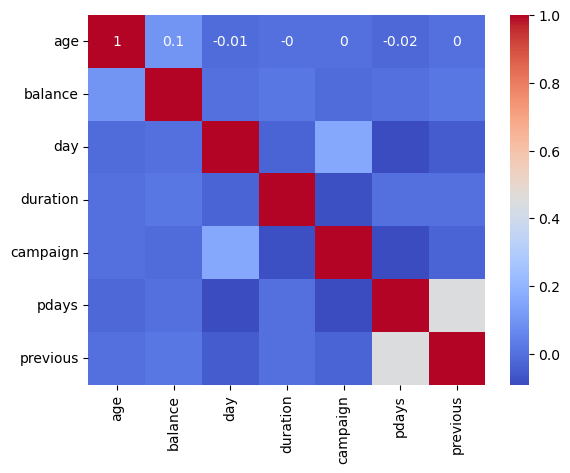

In [160]:
sns.heatmap(numeric_columns.corr().round(2), cmap='coolwarm', annot=True)